In [11]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [12]:
ko_raw = pd.read_csv("C:\\Users\\SUKHJIT\\Documents\\AMS325-FinalProject\\AMS325-RawProjectData\\KO.csv", parse_dates=['Date'])
#parsed the date column into date format
print(ko_raw)

ko_proc = ko_raw.drop(columns=['Open','High','Low','Adj Close','Volume'])
ko_proc["Percent Change"] = ko_proc['Close'].pct_change()*100

start = (np.where(ko_proc['Date'] == datetime.datetime(2015, 1, 2))[0])[0]
end = (np.where(ko_proc['Date'] == datetime.datetime(2019, 12, 31))[0])[0]+1
ko_proc = ko_proc[start:end]

print(ko_proc)
#Left with Close and Percent Change of Close Columns from Jan 2 2015 to end of 2019

#summary statistics of percent change column
ave_kooverall = ko_proc['Percent Change'].describe()['mean']
print('Overall average percent change:', ave_kooverall)

            Date       Open       High        Low      Close  Adj Close  \
0     1962-01-02   0.263021   0.270182   0.263021   0.263021   0.048145   
1     1962-01-03   0.259115   0.259115   0.253255   0.257161   0.047072   
2     1962-01-04   0.257813   0.261068   0.257813   0.259115   0.047430   
3     1962-01-05   0.259115   0.262370   0.252604   0.253255   0.046357   
4     1962-01-08   0.251302   0.251302   0.245768   0.250651   0.045881   
...          ...        ...        ...        ...        ...        ...   
15584 2023-11-29  58.580002  58.669998  58.099998  58.230000  57.770000   
15585 2023-11-30  57.959999  58.459999  57.599998  58.439999  58.439999   
15586 2023-12-01  58.270000  58.689999  58.240002  58.639999  58.639999   
15587 2023-12-04  58.590000  58.959999  58.439999  58.570000  58.570000   
15588 2023-12-05  58.549999  58.830002  58.419998  58.660000  58.660000   

         Volume  
0        806400  
1       1574400  
2        844800  
3       1420800  
4       2

In [13]:
#this stores the overall average during this time period
print(ko_proc)
ave_ko_overall = ko_proc['Percent Change'].describe()['mean']

#in this code, th15s correkoonds to th = thanksgiving, 15 = year 2015, and s = start of 4-5 business day interval
#the years change for each one to be included in the analysis
#the dates listed in each statement are the start / end date to be included in the analysis
th15s = (np.where(ko_proc['Date'] == datetime.datetime(2015, 11, 24))[0])[0]
th15e = (np.where(ko_proc['Date'] == datetime.datetime(2015, 11, 30))[0])[0]+1
th16s = (np.where(ko_proc['Date'] == datetime.datetime(2016, 11, 22))[0])[0]
th16e = (np.where(ko_proc['Date'] == datetime.datetime(2016, 11, 28))[0])[0]+1
th17s = (np.where(ko_proc['Date'] == datetime.datetime(2017, 11, 21))[0])[0]
th17e = (np.where(ko_proc['Date'] == datetime.datetime(2017, 11, 27))[0])[0]+1
th18s = (np.where(ko_proc['Date'] == datetime.datetime(2018, 11, 20))[0])[0]
th18e = (np.where(ko_proc['Date'] == datetime.datetime(2018, 11, 26))[0])[0]+1
th19s = (np.where(ko_proc['Date'] == datetime.datetime(2019, 11, 26))[0])[0]
th19e = (np.where(ko_proc['Date'] == datetime.datetime(2019, 12, 2))[0])[0]+1
print(th15s, th15e, th16s, th16e, th17s, th17e, th18s, th18e, th19s, th19e)

#This concatenates the 5 selected intervals into one dataframe, ko_th, which contains the thanksgivings for this stock, S&P 500
ko_th = pd.concat([ko_proc.iloc[th15s:th15e],ko_proc.iloc[th16s:th16e],ko_proc.iloc[th17s:th17e],ko_proc.iloc[th18s:th18e],ko_proc.iloc[th19s:th19e],], ignore_index=True)
print(ko_th)

#this line obtains the mean of the thanksgiving data
ave_koth = ko_th['Percent Change'].describe()['mean']
print(ave_koth, ave_ko_overall)

#Outputs t-test for significance of difference from overall performance during this time
#In this case, with a pvalue of 0.839, the answer is no signficant differents
statistic, pvalue_koth = stats.ttest_ind(a=ko_proc['Percent Change'], b=ko_th['Percent Change'], equal_var=False)
print(pvalue_koth)

            Date      Close  Percent Change
13342 2015-01-02  42.139999       -0.189488
13343 2015-01-05  42.139999        0.000000
13344 2015-01-06  42.459999        0.759374
13345 2015-01-07  42.990002        1.248241
13346 2015-01-08  43.509998        1.209574
...          ...        ...             ...
14595 2019-12-24  54.709999       -0.364234
14596 2019-12-26  55.020000        0.566626
14597 2019-12-27  55.349998        0.599778
14598 2019-12-30  55.270000       -0.144531
14599 2019-12-31  55.349998        0.144740

[1258 rows x 3 columns]
226 230 477 481 728 732 979 983 1234 1238
         Date      Close  Percent Change
0  2015-11-24  43.360001        0.931103
1  2015-11-25  43.360001        0.000000
2  2015-11-27  43.150002       -0.484315
3  2015-11-30  42.619999       -1.228280
4  2016-11-22  41.369999        0.024173
5  2016-11-23  41.119999       -0.604303
6  2016-11-25  41.529999        0.997082
7  2016-11-28  41.750000        0.529740
8  2017-11-21  45.779999        0.70

In [14]:
#in this code, th15s correkoonds to th = thanksgiving, 15 = year 2015, and s = start of 4-5 business day interval
#the years change for each one to be included in the analysis
#the dates listed in each statement are the start / end date to be included in the analysis
va15s = (np.where(ko_proc['Date'] == datetime.datetime(2015, 2, 12))[0])[0]
va15e = (np.where(ko_proc['Date'] == datetime.datetime(2015, 2, 18))[0])[0]+1
va16s = (np.where(ko_proc['Date'] == datetime.datetime(2016, 2, 11))[0])[0]
va16e = (np.where(ko_proc['Date'] == datetime.datetime(2016, 2, 17))[0])[0]+1
va17s = (np.where(ko_proc['Date'] == datetime.datetime(2017, 2, 10))[0])[0]
va17e = (np.where(ko_proc['Date'] == datetime.datetime(2017, 2, 16))[0])[0]+1
va18s = (np.where(ko_proc['Date'] == datetime.datetime(2018, 2, 12))[0])[0]
va18e = (np.where(ko_proc['Date'] == datetime.datetime(2018, 2, 16))[0])[0]+1
va19s = (np.where(ko_proc['Date'] == datetime.datetime(2019, 2, 12))[0])[0]
va19e = (np.where(ko_proc['Date'] == datetime.datetime(2019, 2, 19))[0])[0]+1
print(va15s, va15e, va16s, va16e, va17s, va17e, va18s, va18e, va19s, va19e)

#This concatenates the 5 selected intervals into one dataframe, ko_va, which contains the thanksgivings for vais stock, S&P 500
ko_va = pd.concat([ko_proc.iloc[va15s:va15e],ko_proc.iloc[va16s:va16e],ko_proc.iloc[va17s:va17e],ko_proc.iloc[va18s:va18e],ko_proc.iloc[va19s:va19e],], ignore_index=True)
print(ko_va)

#this line obtains the mean of the thanksgiving data
ave_kova = ko_va['Percent Change'].describe()['mean']
print(ave_kova, ave_ko_overall)

#Outputs t-test for significance of difference from overall performance during this time
#In this case, with a pvalue of 0.0015, the answer is a signficant difference
#the valentines day performance is higher
statistic, pvalue_kova = stats.ttest_ind(a=ko_proc['Percent Change'], b=ko_va['Percent Change'], equal_var=False)
print(pvalue_kova)

28 32 279 283 531 536 783 788 1034 1039
         Date      Close  Percent Change
0  2015-02-12  42.169998       -0.472034
1  2015-02-13  41.990002       -0.426834
2  2015-02-17  41.810001       -0.428676
3  2015-02-18  41.730000       -0.191344
4  2016-02-11  42.410000       -0.329022
5  2016-02-12  43.110001        1.650556
6  2016-02-16  43.360001        0.579912
7  2016-02-17  43.490002        0.299818
8  2017-02-10  40.580002       -1.624238
9  2017-02-13  40.619999        0.098563
10 2017-02-14  40.529999       -0.221566
11 2017-02-15  40.439999       -0.222058
12 2017-02-16  41.200001        1.879332
13 2018-02-12  43.970001        1.947600
14 2018-02-13  44.189999        0.500337
15 2018-02-14  44.099998       -0.203668
16 2018-02-15  44.779999        1.541952
17 2018-02-16  44.980000        0.446630
18 2019-02-12  49.660000        0.100784
19 2019-02-13  49.790001        0.261782
20 2019-02-14  45.590000       -8.435431
21 2019-02-15  45.240002       -0.767708
22 2019-02-19  44

In [15]:
#in this code, th15s correkoonds to th = thanksgiving, 15 = year 2015, and s = start of 4-5 business day interval
#the years change for each one to be included in the analysis
#the dates listed in each statement are the start / end date to be included in the analysis
fj15s = (np.where(ko_proc['Date'] == datetime.datetime(2015, 7, 1))[0])[0]
fj15e = (np.where(ko_proc['Date'] == datetime.datetime(2015, 7, 7))[0])[0]+1
fj16s = (np.where(ko_proc['Date'] == datetime.datetime(2016, 6, 30))[0])[0]
fj16e = (np.where(ko_proc['Date'] == datetime.datetime(2016, 7, 6))[0])[0]+1
fj17s = (np.where(ko_proc['Date'] == datetime.datetime(2017, 6, 30))[0])[0]
fj17e = (np.where(ko_proc['Date'] == datetime.datetime(2017, 7, 6))[0])[0]+1
fj18s = (np.where(ko_proc['Date'] == datetime.datetime(2018, 7, 2))[0])[0]
fj18e = (np.where(ko_proc['Date'] == datetime.datetime(2018, 7, 6))[0])[0]+1
fj19s = (np.where(ko_proc['Date'] == datetime.datetime(2019, 7, 2))[0])[0]
fj19e = (np.where(ko_proc['Date'] == datetime.datetime(2019, 7, 8))[0])[0]+1
print(fj15s, fj15e, fj16s, fj16e, fj17s, fj17e, fj18s, fj18e, fj19s, fj19e)

#This concatenates the 5 selected intervals into one dataframe, ko_fj, which contains the thanksgivings for vais stock, S&P 500
ko_fj = pd.concat([ko_proc.iloc[fj15s:fj15e],ko_proc.iloc[fj16s:fj16e],ko_proc.iloc[fj17s:fj17e],ko_proc.iloc[fj18s:fj18e],ko_proc.iloc[fj19s:fj19e],], ignore_index=True)
print(ko_fj)

#this line obtains the mean of the thanksgiving data
ave_kofj = ko_fj['Percent Change'].describe()['mean']
print(ave_kofj, ave_ko_overall)

#Outputs t-test for significance of difference from overall performance during this time
#In this case, with a pvalue of 0.207, the conclusion is that the differences are insignificant
statistic, pvalue_kofj = stats.ttest_ind(a=ko_proc['Percent Change'], b=ko_fj['Percent Change'], equal_var=False)
print(pvalue_kofj)

124 128 376 380 628 632 880 884 1131 1135
         Date      Close  Percent Change
0  2015-07-01  39.500000        0.688249
1  2015-07-02  39.490002       -0.025311
2  2015-07-06  39.419998       -0.177270
3  2015-07-07  40.250000        2.105535
4  2016-06-30  45.330002        2.002707
5  2016-07-01  45.119999       -0.463276
6  2016-07-05  45.430000        0.687059
7  2016-07-06  45.270000       -0.352190
8  2017-06-30  44.849998        0.044604
9  2017-07-03  44.759998       -0.200669
10 2017-07-05  44.820000        0.134053
11 2017-07-06  44.400002       -0.937077
12 2018-07-02  43.750000       -0.250800
13 2018-07-03  43.990002        0.548576
14 2018-07-05  44.660000        1.523069
15 2018-07-06  44.639999       -0.044785
16 2019-07-02  51.980000        0.736438
17 2019-07-03  52.099998        0.230854
18 2019-07-05  52.110001        0.019200
19 2019-07-08  52.000000       -0.211094
0.3028935315068332 0.025588281900367188
0.14112957156848085


In [16]:
#in this code, th15s correkoonds to th = thanksgiving, 15 = year 2015, and s = start of 4-5 business day interval
#the years change for each one to be included in the analysis
#the dates listed in each statement are the start / end date to be included in the analysis
ch15s = (np.where(ko_proc['Date'] == datetime.datetime(2015, 12, 23))[0])[0]
ch15e = (np.where(ko_proc['Date'] == datetime.datetime(2015, 12, 29))[0])[0]+1
ch16s = (np.where(ko_proc['Date'] == datetime.datetime(2016, 12, 22))[0])[0]
ch16e = (np.where(ko_proc['Date'] == datetime.datetime(2016, 12, 28))[0])[0]+1
ch17s = (np.where(ko_proc['Date'] == datetime.datetime(2017, 12, 21))[0])[0]
ch17e = (np.where(ko_proc['Date'] == datetime.datetime(2017, 12, 27))[0])[0]+1
ch18s = (np.where(ko_proc['Date'] == datetime.datetime(2018, 12, 20))[0])[0]
ch18e = (np.where(ko_proc['Date'] == datetime.datetime(2018, 12, 27))[0])[0]+1
ch19s = (np.where(ko_proc['Date'] == datetime.datetime(2019, 12, 20))[0])[0]
ch19e = (np.where(ko_proc['Date'] == datetime.datetime(2019, 12, 27))[0])[0]+1
print(ch15s, ch15e, ch16s, ch16e, ch17s, ch17e, ch18s, ch18e, ch19s, ch19e)

#This concatenates the 5 selected intervals into one dataframe, ko_ch, which contains the thanksgivings for vais stock, S&P 500
ko_ch = pd.concat([ko_proc.iloc[ch15s:ch15e],ko_proc.iloc[ch16s:ch16e],ko_proc.iloc[ch17s:ch17e],ko_proc.iloc[ch18s:ch18e],ko_proc.iloc[ch19s:ch19e],], ignore_index=True)
print(ko_ch)

#this line obtains the mean of the thanksgiving data
ave_koch = ko_ch['Percent Change'].describe()['mean']
print(ave_koch, ave_ko_overall)

#Outputs t-test for significance of difference from overall performance during this time
#In this case, with a pvalue of 0.786, the conclusion is that the differences are insignificant
statistic, pvalue_koch = stats.ttest_ind(a=ko_proc['Percent Change'], b=ko_ch['Percent Change'], equal_var=False)
print(pvalue_koch)

246 250 498 502 749 753 999 1004 1251 1256
         Date      Close  Percent Change
0  2015-12-23  43.669998        0.877794
1  2015-12-24  43.540001       -0.297680
2  2015-12-28  43.490002       -0.114835
3  2015-12-29  43.709999        0.505856
4  2016-12-22  41.549999       -0.048114
5  2016-12-23  41.599998        0.120335
6  2016-12-27  41.610001        0.024046
7  2016-12-28  41.389999       -0.528724
8  2017-12-21  45.599998       -1.041675
9  2017-12-22  45.590000       -0.021925
10 2017-12-26  45.810001        0.482564
11 2017-12-27  45.930000        0.261949
12 2018-12-20  47.540001       -0.751568
13 2018-12-21  47.570000        0.063103
14 2018-12-24  45.959999       -3.384488
15 2018-12-26  46.939999        2.132289
16 2018-12-27  47.529999        1.256924
17 2019-12-20  54.970001        1.196615
18 2019-12-23  54.910000       -0.109152
19 2019-12-24  54.709999       -0.364234
20 2019-12-26  55.020000        0.566626
21 2019-12-27  55.349998        0.599778
0.064794644251

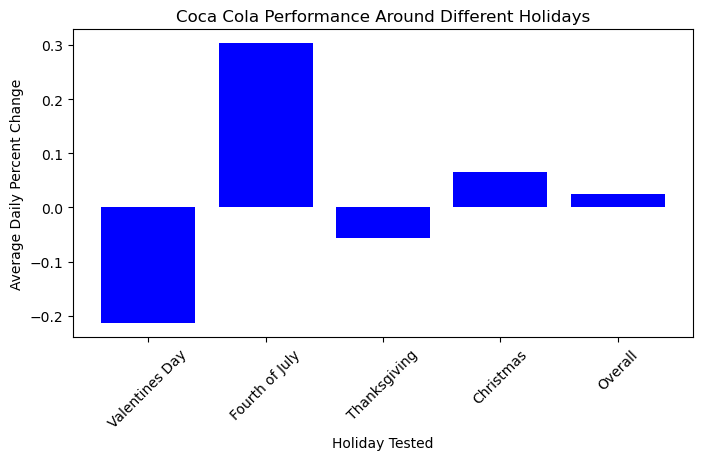

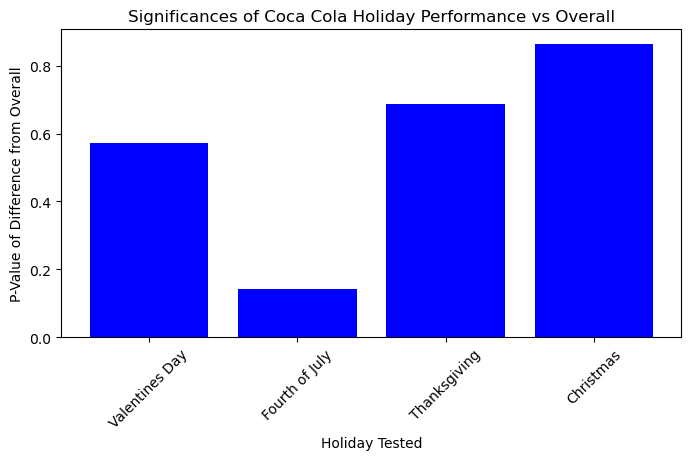

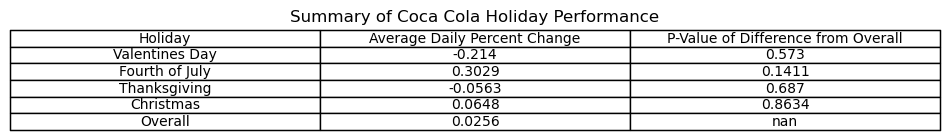

In [17]:
ko_summary = pd.DataFrame({'Holiday': ['Valentines Day', 'Fourth of July', 'Thanksgiving', 'Christmas', 'Overall'], 
              'Average Daily Percent Change': [ave_kova, ave_kofj, ave_koth, ave_koch, ave_kooverall], 'P-Value of Difference from Overall':[pvalue_kova, pvalue_kofj, pvalue_koth, pvalue_koch, None]})

#First, bar graph showing the daily performance around holidays is shown
plt.figure(figsize=(8, 4))
plt.bar(ko_summary['Holiday'], ko_summary['Average Daily Percent Change'], color='b')
plt.title('Coca Cola Performance Around Different Holidays')
plt.xlabel('Holiday Tested')
plt.ylabel('Average Daily Percent Change')
plt.xticks(rotation=45)
plt.savefig('ko_holidays_pct_chg.jpg', bbox_inches="tight")
plt.show()

#Next, the p-value of the difference from the overall performance is shown
plt.figure(figsize=(8, 4))
plt.bar(ko_summary[0:4]['Holiday'], ko_summary[0:4]['P-Value of Difference from Overall'], color='b')
plt.title('Significances of Coca Cola Holiday Performance vs Overall')
plt.xlabel('Holiday Tested')
plt.ylabel('P-Value of Difference from Overall')
plt.xticks(rotation=45)
plt.savefig('ko_holidays_pvalues_chg.jpg', bbox_inches="tight")
plt.show()

plt.figure(figsize=(12, 1.3))
plt.title('Summary of Coca Cola Holiday Performance')
plt.table(cellText = ko_summary.round(4).values, colLabels= ko_summary.columns,
              loc='center',cellLoc='center')
plt.xticks([])
plt.yticks([])
plt.savefig('ko_holidays_table.jpg', bbox_inches="tight")
plt.show()

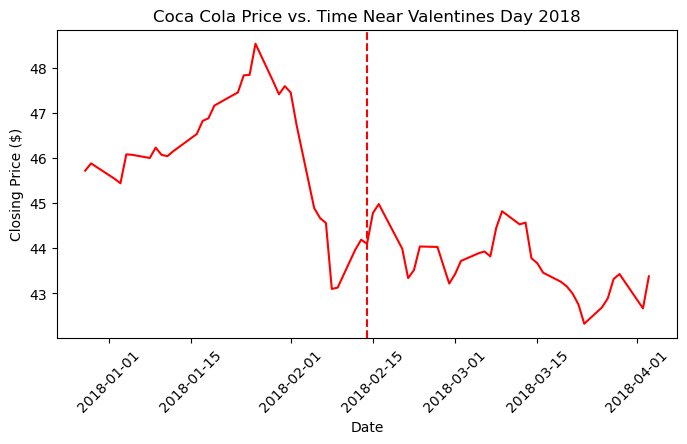

In [20]:
plt.figure(figsize=(8, 4))
plt.plot(ko_proc.iloc[va18s-30:va18e+30]['Date'], ko_proc.iloc[va18s-30:va18e+30]['Close'], linestyle='-', color='r')
plt.title('Coca Cola Price vs. Time Near Valentines Day 2018')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.xticks(rotation=45)
plt.axvline(x = datetime.datetime(2018, 2, 14), color = 'r', linestyle = '--')
plt.savefig('ko_prices_va2018.jpg', bbox_inches="tight")
plt.show()